## PROJET PYTHON POUR LA DATA SCIENCE 2022 💻

## THEME : ANALYSE DES AVIS DES STAGIAIRES ET EMPLOYES DE SOCIETE GENERALE TRANSMIS VIA LA PLATEFORME INDEED.COM ENTRE 2012 ET 2022  

## Auteurs:
* TALEB AHMED Raja
* MAGAJIE WAMSA Berthe Magella
* RENE Léo

## ANALYSE DE DONNEES ET NATURAL LANGUAGE PROCESSING (NLP)

### INTRODUCTION

  ### Contexte et Justification du projet

  Société Générale est l'un des tout premiers groupes européens de services financiers et acteur important de l’économie depuis plus de 150 ans. Au quotidien, 25 millions de clients sont accompagnés grâce à ses plus de 117 000 collaborateurs répartis dans 66 pays. Le groupe Société Générale se positionne en partenaire de confiance pour ses clients, engagé dans le développement durable de l’Afrique, ou bien encore pour l'accompagnement de la transition écologique mondiale. Quatre principales valeurs y sont partagées selon le site officiel du groupe : Esprit d’équipe, Innovation, Responsabilité, Engagement (https://www.societegenerale.com/fr/le-groupe-societe-generale/identite/presentation).  
  
  L’ENSAE Paris a noué des partenariats structurants avec des entreprises visant à améliorer leur visibilité auprès des élèves et à favoriser l’émergence des projets communs. Société Générale fait partie de ces partenaires prestigeux. Avec plus de 600 métiers dans le monde, l’entreprise recrute en effet des talents dans de nombreux secteurs : risques, IT, data, consulting interne, etc. Pour les étudiants ou jeunes diplômés curieux et motivés par les défis d’une grande banque, il s'agirait du cadre adéquat; aussi, sa promesse est d'offrir à tout employé un environnement dans lequel il s'épanouie en développant son potentiel (https://www.ensae.fr/entreprises/devenir-partenaire-de-lensae-paris/nos-partenaires).
  
  Indeed est une plateforme de recherche d'emplois qui permet aux employeurs de publier des offres et aux personnes en quête d'emplois de postuler; aussi des avis sur les entreprises y sont transmis, faisant office de retour d'expérience. Ces avis, s'ils sont bien exploités, peuvent être utiles non seulement aux chercheurs d'emplois dans leur quête, mais aussi aux entreprises pour l'amélioration du quotidien de leurs employés. 

  ### Objectifs
  
L'objectif général de ce projet est d'évaluer la Société Générale au travers des retours d'expériences et avis de ceux qui y ont travaillé et ceux qui y travaillent encore. Plus spécifiquement, il s'agit de:
   * Décrire les avis transmis sur Indeed selon plusieurs critères;
   * Présenter un niveau d'appréciation global;
   * Ressortir les préoccupations les plus fréquentes;
   * Analyser les potentiels facteurs qui influencent le niveau d'appréciation des employés et stagiaires. 

  ### Méthodologie du projet

Afin d'atteindre les objectifs énoncés ci-dessus, nous avons utilisé les méthodes suivantes:

   - Web-Scrapping :
Pour constituer notre base de données, nous avons extrait des données structurées sur le Web de manière automatisée; autrement dit, nous avons usé du webscrapping sur le site Indeed.com.

   - NLP (Natural Language Processing):
C'est une méthode à l’intersection du Machine Learning et de la linguistique ayant pour but d'extraire de l'information et une signification d’un contenu textuel. Nous l'avons utilisée ici pour effectuer de la detection des langues dans les commentaires, les wordclouds, l'analyse sentimentale ainsi que la detection des différentes aspects les plus abordés dans les commentaires (topic modeling).

In [41]:
#installation des packages nécéssaires
!pip install pandas
!pip install langdetect 
!pip install wordcloud
!pip install nltk
!pip install  gensim
!pip install vaderSentiment
!pip install textblob
!pip install textblob-fr
!pip install vaderSentiment-fr
!pip install deep-translator
!pip install yellowbrick

In [100]:
# Importation des packages utiles
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

from textblob import TextBlob
from textblob import TextBlob, Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
from langdetect import detect # pour detecter les langues
from wordcloud import WordCloud # pour gerer les nuages de mots
import sklearn as sk
from deep_translator import GoogleTranslator 

#stopword français
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords') 

# stopword anglais
import gensim 
from gensim.parsing.preprocessing import STOPWORDS 


#from gensim import corpora

from PIL import Image # pour personaliser la forme du wordcloud

# pour analyser les sentiments
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SenEN
analyzer = SenEN()

#pour les top_10 des mots les plus fréquents
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text.freqdist import FreqDistVisualizer
from yellowbrick.style import set_palette



[nltk_data] Downloading package stopwords to /home/onyxia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/onyxia/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/onyxia/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## I- TRAITEMENT DES DONNEES

In [43]:
# Importation de la base de données
df = pd.read_csv("Database.csv",sep=",")

**Description de la base de données initiale**

In [44]:
print("Il y a", len(df), "individus dans notre base de données.")
print(df.columns)
df.sample(3)

Il y a 2520 individus dans notre base de données.
Index(['Country', 'rating', 'contract', 'is_employed', 'job', 'city', 'date',
       'comment'],
      dtype='object')


,Country,rating,contract,is_employed,job,city,date,comment
2400,Indie,4.0,NaN,True,Process Executive,"Bangalore, Karnataka",2017,"Good place to work, good facilities and nice w..."
626,France,4.0,stage,False,"Intern, Risks Management",Paris (75),2019,"Great place to work, great managers, great emp..."
716,France,3.0,NaN,False,Apprentie Gestion et Suivi des Avenants,Strasbourg (67),2018,"Une très belle expérience professionnelle, je ..."


In [45]:
#Création d'une copie de la base
df_new = df.copy()

In [46]:
#Remplacer True et False dans la  colonne is_employed du DataFrame par 1 et 0
df_new['is_employed'] = df_new['is_employed'].replace([True], 1)
df_new['is_employed'] = df_new['is_employed'].replace([False], 0)

In [47]:
#Vérification types des variables
print(df_new.dtypes)

Country         object
rating         float64
contract        object
is_employed      int64
job             object
city            object
date             int64
comment         object
dtype: object


In [48]:
#Nombre de modalités pour chacune des variables
df_new.nunique()

Country           3
rating            5
contract          3
is_employed       2
job            1706
city            803
date             11
comment        2518
dtype: int64

In [49]:
#Vérification valeurs manquantes
df_new.count()

Country        2520
rating         2520
contract        237
is_employed    2520
job            2520
city           2520
date           2520
comment        2520
dtype: int64

La seule variable contenant des valeurs manquantes est "contract" avec seulement 237 valeurs renseignées; Un peu moins du dizième des personnes ont précisé le contrat dans leurs commentaires.

In [50]:
#Suppression des codes postaux dans la colonne city 
characters = ")(1234567890"
df_new['city'] = df_new['city'].apply(lambda x: x.strip(characters))
df_new.head(3)

,Country,rating,contract,is_employed,job,city,date,comment
0,France,3.0,cdd,0,Conseillère clientèle,Massy,2022,"Bonne équipe, dommage que la direction soit bl..."
1,France,5.0,NaN,0,Responsable,Falaise,2022,"Équipe au top, l'esprit d'équipe fait la force..."
2,France,4.0,NaN,0,Compliance Officer,Nanterre,2022,"bonne ambiance, bonne équipe, bon relationnel,..."


In [51]:
#Ajustement de la police pour éviter les problèmes liés à la sensibilité à la casse.
df_new['city'] = df_new['city'].apply(lambda x: x.lower())
df_new['comment']=df_new['comment'].apply(lambda x: x.lower())
df_new['job']=df_new['job'].apply(lambda x: x.lower())
df_new.sample(3)

,Country,rating,contract,is_employed,job,city,date,comment
816,France,5.0,NaN,1,conseiller en formation,paris,2018,une très bonne expérience qui m'as permis d'ac...
1305,France,5.0,stage,0,assistante-stagiaire en ventes institutionnels,"casablanca, fr",2017,stage enrichissant\nequipe dynamique\ntâches i...
2132,US,2.0,NaN,0,product control group specialist,"new york, ny",2012,no job security as most of their operations jo...


In [52]:
#Suppression des espaces dans la colonne city
df_new['city'] = df_new['city'].apply(lambda x: str(x).strip(' '))

In [53]:
# Définition d'une fonction qui permettra de nettoyer nos données textuelles
import re
def clean(texte):
    # Suppression des liens
    for item in re.compile("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+").findall(texte):
        texte=texte.replace(item, "")
    # Suppression du retour à la ligne
    texte = texte.replace("\n", " ").replace("\r", "") 
    # Suppression des caractères ",", "!", "?", "%", "(",")","/",'"', "$","£", "_", "-", "+", "*",".", "µ", ":","&,"§" 
    texte = re.sub(r"[,\!\?\%\(\)\/\"\$\£\+\*\µ,\:\&\§]", " ", texte) 
    # Suppression des apostrophes '
    for item in re.compile("([\’])").findall(texte):
        texte=texte.replace(item, " ")
    for item in re.compile("([\'])").findall(texte):
        texte=texte.replace(item, " ")
    # Suppression des points de suspension
    for item in re.compile("([.]{1,5})").findall(texte):
        texte=texte.replace(item, "") 
    # Suppression des adresses mail
    for item in re.findall('\S+@\S+', texte) :
        texte=texte.replace(item, "")
    # Suppression des mots contenant des chiffres
    texte = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", texte)
    # Diviser les mots attachés
    texte = " ".join([s for s in re.split("([A-Z][a-z]+[^A-Z]*)",texte) if s])
    return texte

In [54]:
df_new["comment"] = df_new["comment"].apply(lambda x: clean(x))
df_new["city"] = df_new["city"].apply(lambda x: clean(x))
df_new["job"] = df_new["job"].apply(lambda x: clean(x))
df_new.sample(3)

,Country,rating,contract,is_employed,job,city,date,comment
2071,US,4.0,NaN,0,it service delivery manager,new york ny,2015,work life balance isn t too bad for most of th...
1876,US,5.0,NaN,0,director-rate sales americas,new york ny,2019,i worked at sg for close to years on the rate...
627,France,1.0,NaN,0,conseiller clientèle,saint-quentin-en-yvelines,2019,si vous avez ans et que c est votre première ...


In [55]:
# Ajustement des orthographes des villes
ville = ["défense","bangalore","bengaluru", "paris", "fontenay", "new york", "lyon", "massy", "chicago", "marseille", "orléans", "nanterre"]
def rename_city(texte):
    for s in ville:
        if s in texte :
            texte=s
    if texte in ["bengaluru","banglore"]:
        texte="bangalore"
    return texte

In [56]:
df_new["city"] = df_new["city"].apply(lambda x: rename_city(x))
df_new.sample(3)

,Country,rating,contract,is_employed,job,city,date,comment
858,France,3.0,NaN,0,analyste crédit,marcq-en-barœul,2018,ambiance familiale chez cgi finance belle exp...
28,France,5.0,NaN,0,conseillère clientèle,lille,2022,bonne entreprise et sérieuse aide à monter en ...
676,France,4.0,NaN,0,dollar universe production engineer,défense,2019,pour le scheduling le poste est très intéress...


In [57]:
# Ajustement des orthographes des jobs
def rename_job(texte):
    if "stag" in texte :
        texte="stagiaire"
    elif "conseil" in texte and "client" in texte:
        texte="conseiller clientèle"
    elif "chargé" in texte and "client" in texte:
        texte="chargé de clientèle"
    elif "chargé" in texte and "acc" in texte:
        texte="chargé accueil"
    return texte

In [58]:
df_new["job"] = df_new["job"].apply(lambda x: rename_job(x))

## II- ANALYSE DESCRIPTIVE DES DONNEES

Notre base de données contient 2520 lignes qui représentent les individus et 8 colonnes qui sont nos variables que sont : **'country'** qui renferme le pays concerné (France, US ou Inde), **'rating'** qui renferme les notes attribuées (sur 5), **'contract'** pour le type de contrat(Stage, cdd, cdi),  **'is_employed'** qui prend la valeur 1 si l'individu travaille au sein de la SG au moment du commentaire et 0 sinon, **'job'** pour le poste occupé, **'city'** pour le lieu de travail (la ville) , **'date'** pour l'année de publication du commentaire et **'comment'** pour les commentaires.

In [59]:
#Statistiques sommaires sur les notes attribuées
df_new['rating'].describe()

count    2520.000000
mean        3.806746
std         1.089283
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

La plus petite note attribuée est 1 et la plus grande est 5 (Evaluation sur 5). En moyenne, la SG est appréciée par ceux qui y ont travaillé (ou qui y travaillent) avec une note moyenne de 3,8. De plus, seulement 25% des individus ont attribué une note inférieure à 3.

In [60]:
#Effectifs pour chaque modalité de la variable rating 
df_new['rating'].value_counts()

4.0    985
5.0    738
3.0    501
2.0    164
1.0    132
Name: rating, dtype: int64

### Distribution par colonnes

In [61]:
sns.set(font='DejaVu Sans')

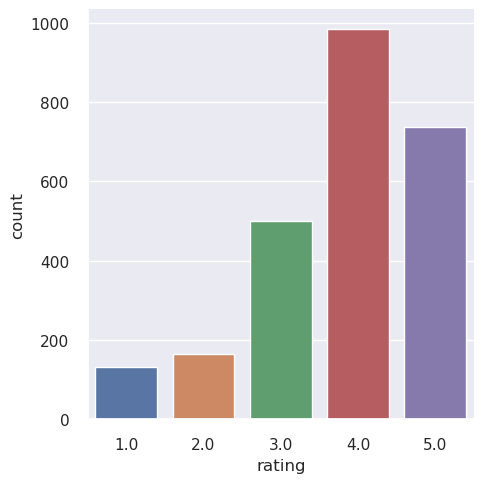

In [62]:
sns.catplot(data=df_new, x='rating', kind='count')
plt.show()

La note la plus attribuée est 4 et la moins attribuée est 1. 

In [63]:
#Effectifs pour chaque modalité de la variable is_employed
df_new['is_employed'].value_counts()

0    1885
1     635
Name: is_employed, dtype: int64

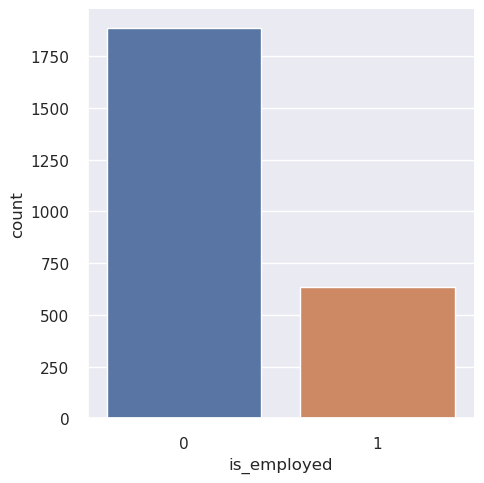

In [64]:
sns.catplot(data=df_new, x='is_employed', kind='count')
plt.show()

Les individus ne travaillant plus au sein de la SG au moment du commentaire (is_employed=0) sont trois fois plus nombreux que ceux en emploi à ce moment.

In [65]:
#Effectifs pour chaque modalité de la variable contract 
print(df_new['contract'].count())
df_new['contract'].value_counts()

237


stage    210
cdd       21
cdi        6
Name: contract, dtype: int64

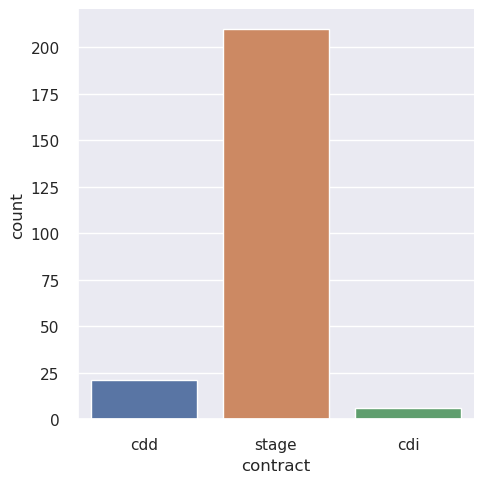

In [66]:
sns.catplot(data=df_new, x='contract', kind='count')
plt.show()

Seuls 237 individus de notre base ont précisé leur contrat de travail au sein de la SG et ce sont en grande majorité des stagiaires.

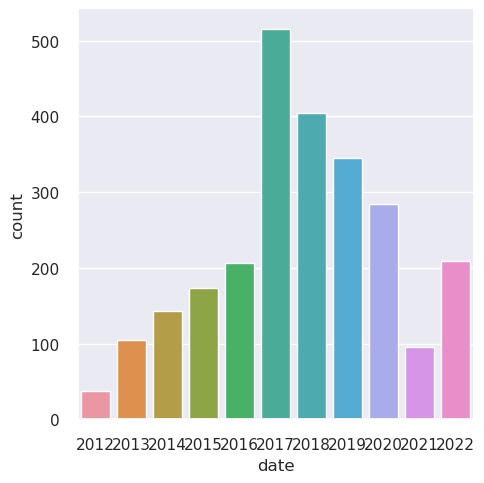

In [67]:
sns.catplot(data=df_new, x='date', kind='count')
plt.show()

Les avis ont été transmis en plus grand nombre en 2017; on note une tendance du nombre de commentaires à la hausse entre 2012 et 2017 et une tendance à la baisse jusqu'en 2021, on remarque une très forte baisse en 2021 peut-être due à Covid-19.

### Distribution des top five Cities

<AxesSubplot: >

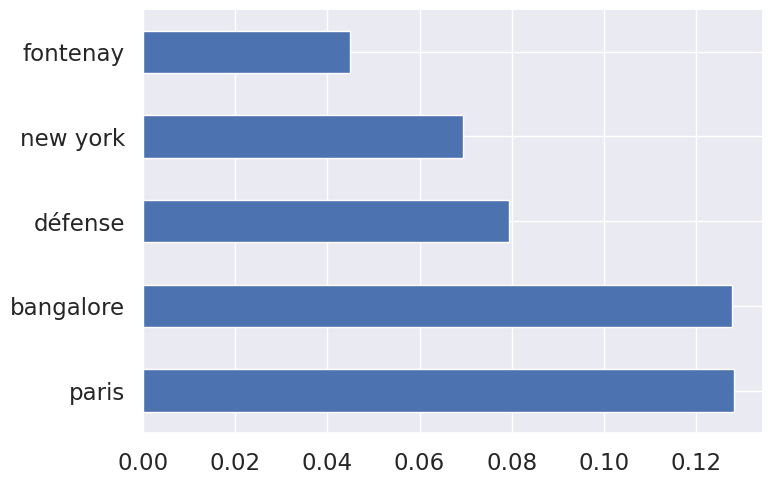

In [68]:
# strip les espaces de la colonne city
# Todo: faire cela dans le scrapping

df_new['city'] = df_new['city'].apply(lambda x: str(x).strip(' '))

#Top 5 des villes les plus mentionnées
sns.set_theme(font_scale=1.5)
cities = df_new['city'].value_counts(normalize=True)
top_cities = cities.nlargest(5)
top_cities.plot(kind='barh', legend=False)

<AxesSubplot: xlabel='rating', ylabel='city'>

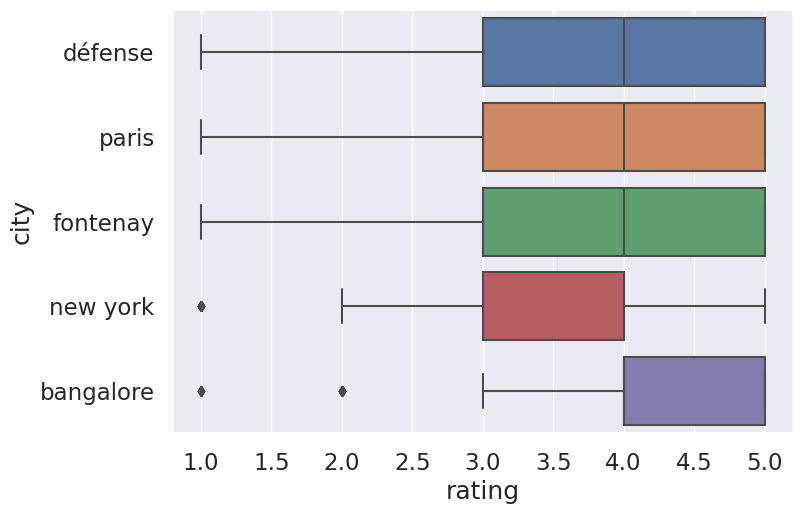

In [69]:
top_cities_index = [city in top_cities.index for city in df_new['city']]
sub_df = df_new[top_cities_index]
sns.boxplot(data=sub_df, x='rating', y='city')

Les cinq lieux de travail les plus mentionnés dans les avis sont **Paris, Bangalore, la défense, New York et Fontenay**.  
Il ressort de ce graphique que les notes attribuées selon les 5 lieux de travail les plus mentionnés sont supérieures à 3 donc les individus ont été satisfaits dans ces lieux.

### Distribution des Ratings

La note la plus attribuée est 4 et la moins attribuée est 1. 

### Rating: anciens employés vs employé actuels

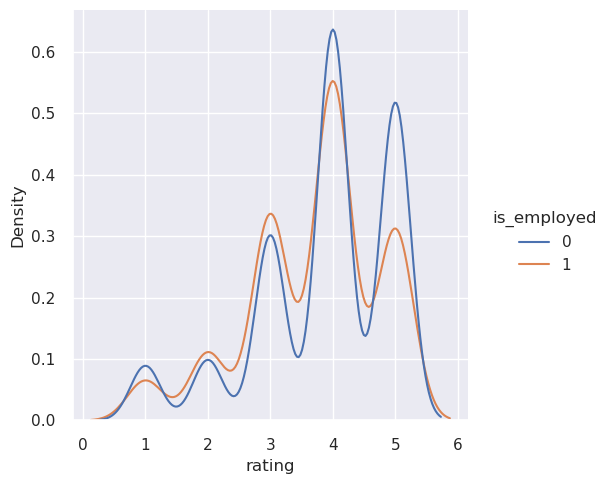

In [70]:
sns.set_theme(font_scale=1)
sns.displot(data=df_new, x='rating', hue='is_employed', kind='kde',common_norm=False)

En comparant les anciens employés et les employés actuels, nous avons remarqué que les anciens employés donnent la note 5/5 de plus que les employés actuels.

### Rating: Contrat

In [71]:
#Effectifs pour chaque modalité de la variable contract 
print(df_new['contract'].count())
df_new['contract'].value_counts()

237


stage    210
cdd       21
cdi        6
Name: contract, dtype: int64

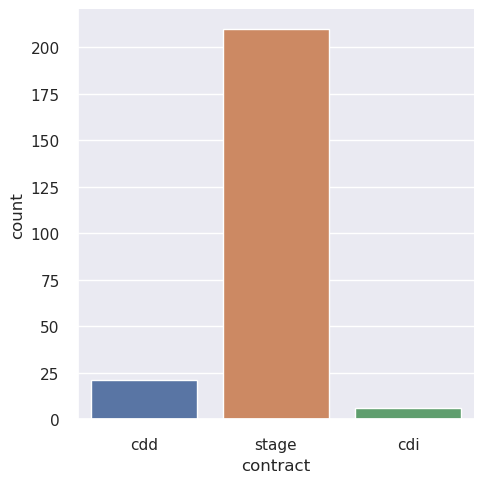

In [72]:
sns.catplot(data=df_new, x='contract', kind='count')
plt.show()

Seuls 237 individus de notre base ont précisé leur contrat de travail au sein de la SG et ce sont en grande majorité des stagiaires.

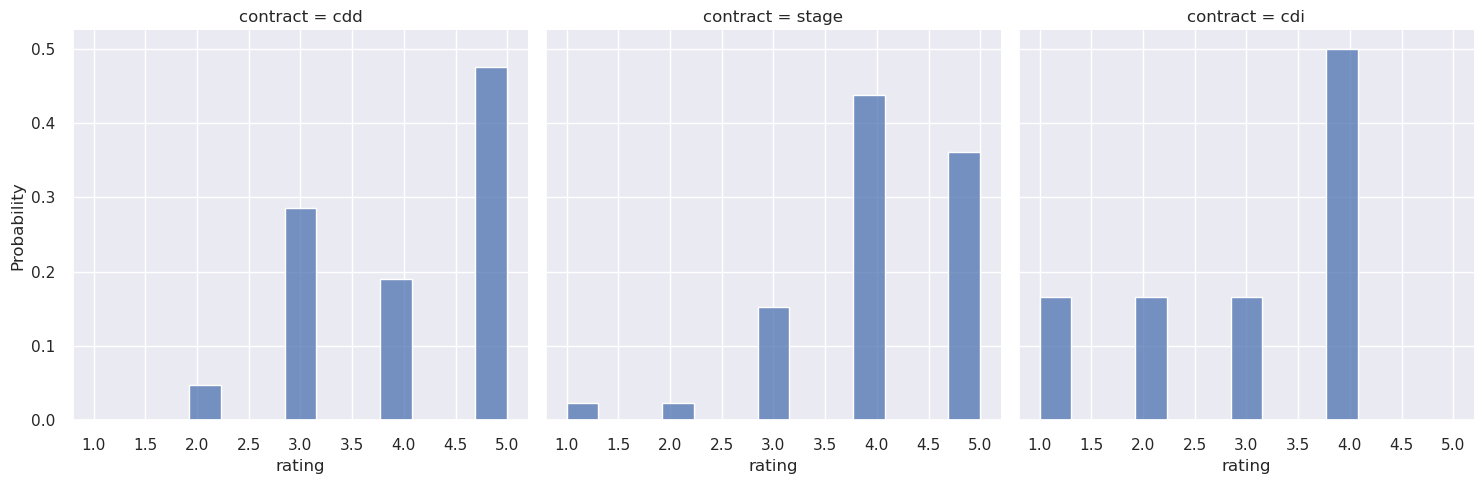

In [73]:
sns.displot(data=df_new, x='rating', col='contract', kind='hist', stat='probability', common_norm=False)

<AxesSubplot: xlabel='rating', ylabel='contract'>

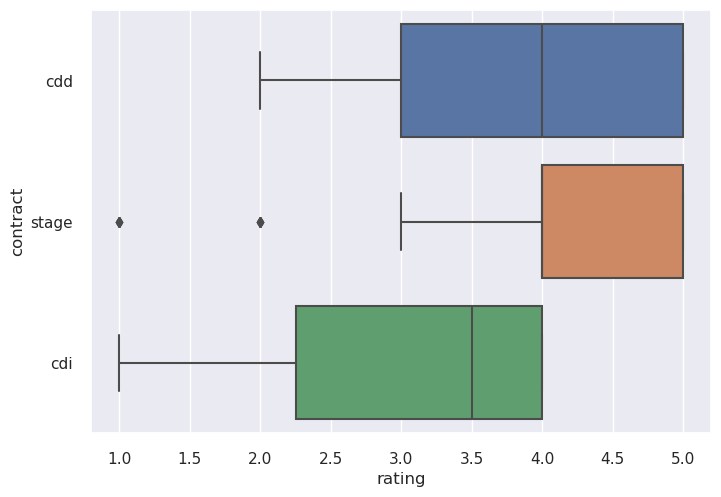

In [74]:
sns.boxplot(data=df_new, x='rating', y='contract')

Les personnes en cdd ont été les mieux satisfaites de leur expérience au sein de la SG compte tenu des notes attribuées. En effet, la majorité d'entre elles a attribué une note de 5/5 et aucune d'entre elles n'a attribué une note inférieure à 2/5. Quant aux personnes en cdi, on note une part relativement importante de personnes ayant attribué une note inférieure à 2. Les stagiaires quant à eux sont majoritairement satisfaits avec une part faible de notes inférieures à 2 75% des stagiaires ont attribué une note entre 4 et 5.

### Rating: pays

<AxesSubplot: xlabel='rating', ylabel='Country'>

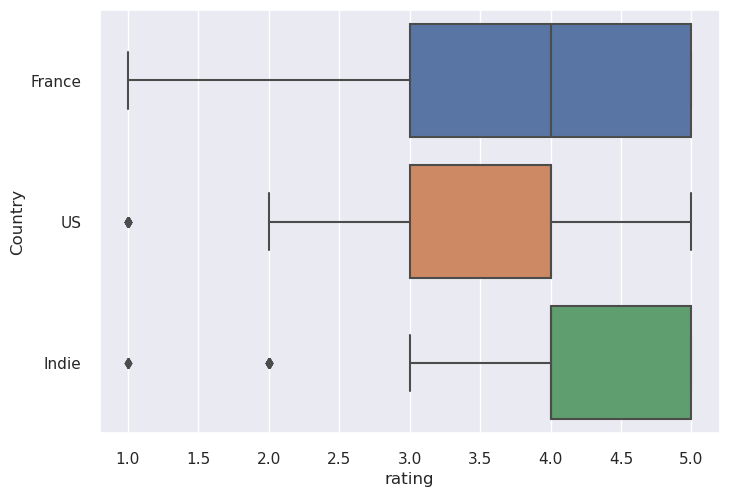

In [75]:
sns.boxplot(data=df_new, x='rating', y='Country')

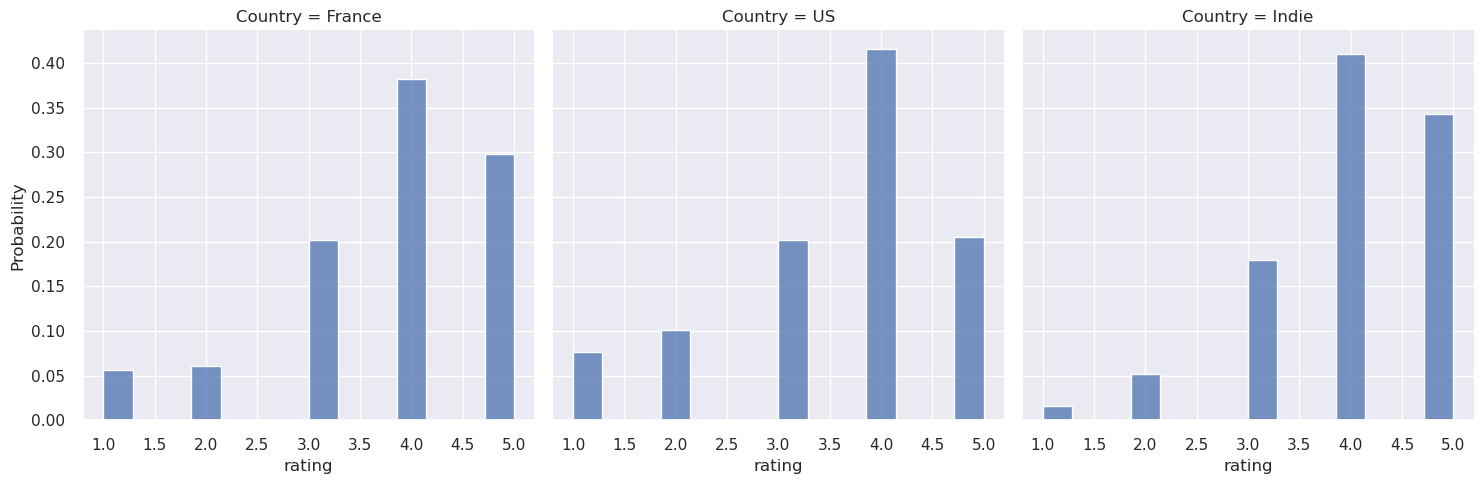

In [76]:
sns.displot(data=df_new, x='rating', col='Country', kind='hist', stat='probability', common_norm=False)

### Ratings: top10 villes

<AxesSubplot: xlabel='rating', ylabel='city'>

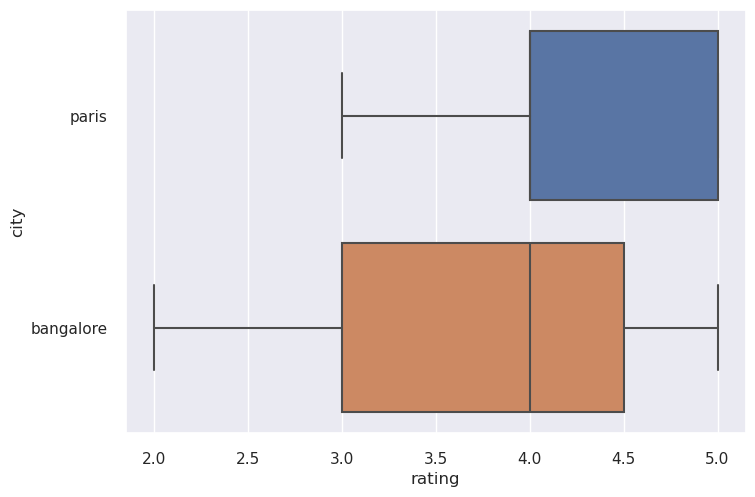

In [77]:
top_cities_index = [city in top_cities.index for city in df['city']]
sub_df = df_new[top_cities_index]
sns.boxplot(data=sub_df, x='rating', y='city')

Il ressort de ce graphique que les notes attribuées selon les 5 lieux de travail les plus mentionnés sont supérieures à 3 donc les individus ont été satisfaits dans ces lieux.

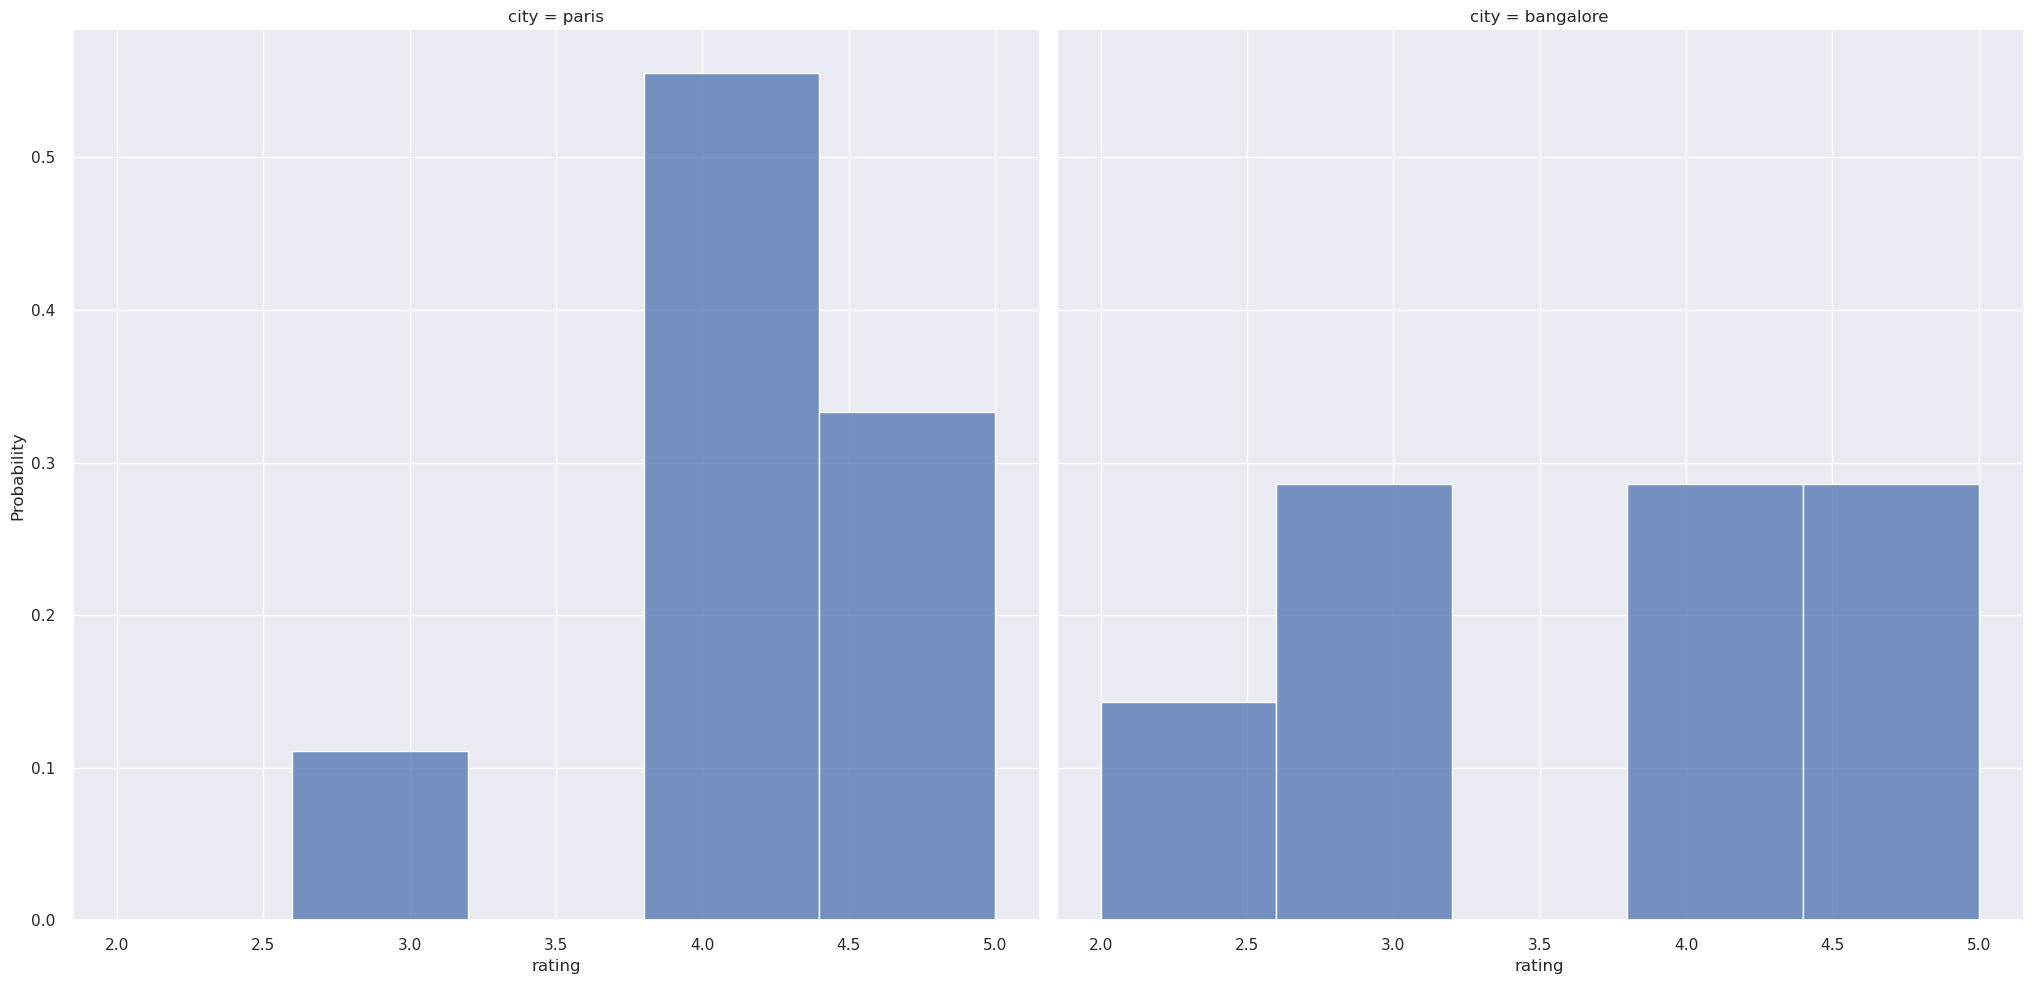

In [78]:
sns.displot(data=sub_df, x='rating', col='city', kind ='hist', height=10, aspect=1, col_wrap=5, stat='probability', common_norm=False)

### Top 5 des postes les plus mentionnés

<AxesSubplot: >

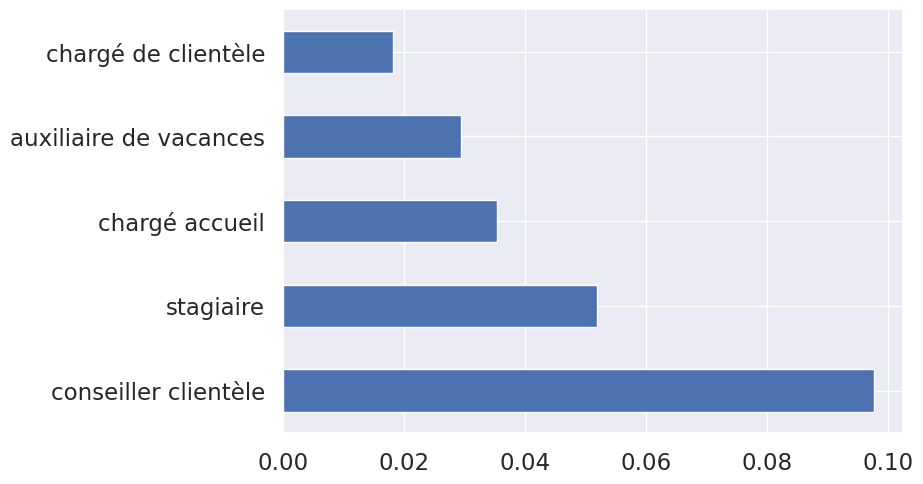

In [79]:
sns.set_theme(font_scale=1.5)
jobs = df_new['job'].value_counts(normalize=True)
top_jobs = jobs.nlargest(5)
top_jobs.plot(kind='barh', legend=False)

In [80]:
df_fr=df_new[df_new['Country']== 'France']
df_us=df_new[df_new['Country']== 'US']
df_in=df_new[df_new['Country']== 'Indie']

## Correlation

Pour avoir une idée des relations qu'il peut y avoir entre les variables, nous pouvons utiliser une heatmap des corrélations entre ces variables

/tmp/ipykernel_5064/1639863647.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()


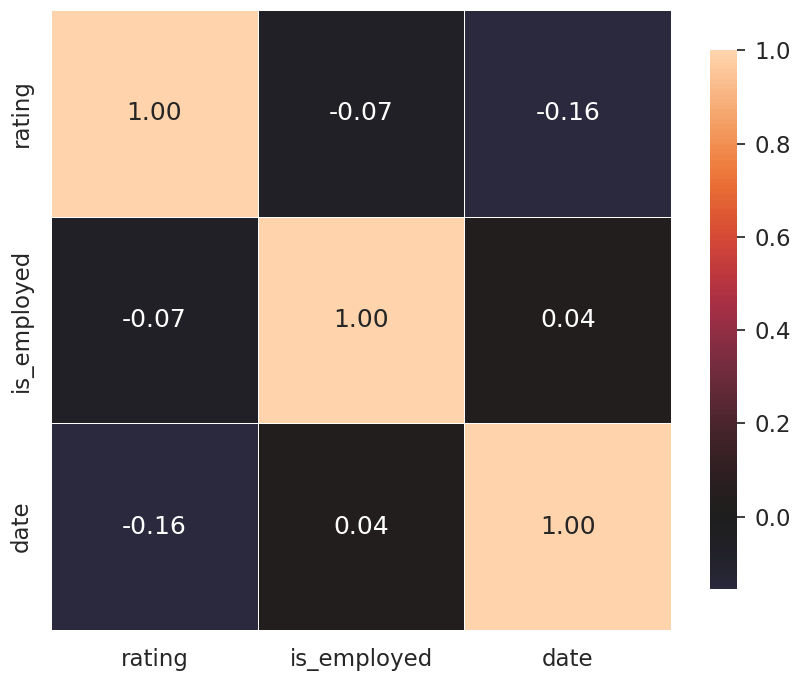

In [81]:
def correlation_heatmap(data):
    correlations = data.corr()
    
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink":.70})
    plt.show()
correlation_heatmap(df_new)

on remarque qu'il y pas une correlation important entre nos variables.

### III- NATURAL LANGUAGE PROCESSING (NLP)

In [82]:
df_comment = df_new.drop(['Country','rating','contract','is_employed','job','date','city'], axis= 1)
df_comment

,comment
0,bonne équipe dommage que la direction soit bl...
1,équipe au top l esprit d équipe fait la force...
2,bonne ambiance bonne équipe bon relationnel ...
3,missions variées solidarité dans l équipe et ...
4,première expérience professionnelle durant an...
...,...
2515,a good working environment with good work-life...
2516,sa ems social audits bpp audits in diamond...
2517,nice banking bussiness had a great time workin...
2518,this is a euro bank and i had great fun in lea...


#### 1) Détection des langues

In [83]:
def langue(text):
    try:
        return detect(text)
    except:
        return None

In [84]:
df_comment['langues']=df_comment['comment'].apply(langue)
print(f"il n'ya que {len(df_comment.langues.unique())} langues trouvées")
df_comment['langues'].value_counts()

il n'ya que 7 langues trouvées


fr    1736
en     773
es       5
pt       3
it       1
tr       1
da       1
Name: langues, dtype: int64

Comme on peut le constater , les commentaires sont rédigés dans 8 langues et la majorité est en Français. Nous pouvons mieux visualiser à l'aide du graphique ci-dessous.

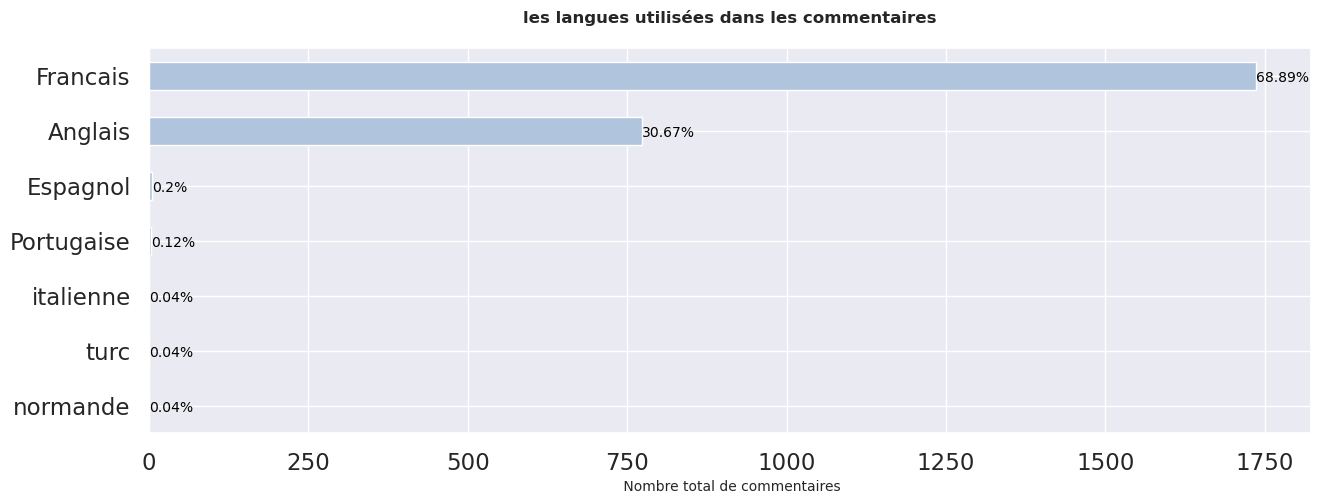

In [86]:
ax=df_comment['langues'].value_counts().sort_values(ascending=False).plot(kind='barh',figsize=(15,5),color='lightsteelblue')
ax.set_title("les langues utilisées dans les commentaires\n", 
             fontsize=12, fontweight='bold')
ax.set_xlabel(" Nombre total de commentaires", fontsize=10)
ax.set_yticklabels(['Francais','Anglais','Espagnol', 'Portugaise','italienne','turc','normande'])
totals = []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
    ax.text(x=i.get_width(), y=i.get_y()+.35, 
            s=str(round((i.get_width()/total)*100, 2))+'%', 
            fontsize=10, color='black')
ax.invert_yaxis()

la majorité des commentaires est en français (68.89%) ou anglais (30.67%).

## Visualisation des données avec les WordClouds.

Ici il s'agit de representer graphiquement les mots qui reviennent le plus dans les commentaires.

In [87]:
df_comment['comment'] = df_comment['comment'].apply(lambda x: str(x).replace('\n', ' '))
df_comment['comment'] = df_comment['comment'].apply(lambda x: str(x).replace('\r', ' '))

In [88]:
df_comment_fr = df_comment[df_comment['langues'] == 'fr']
df_comment_ang = df_comment[df_comment['langues'] == 'en']

## Stop-words

Le package gensim nous a fourni les Stop-words anglais et les stop-words francais proviennent du package nltk. Ces derniers ont été enrichis par d'autres stop-words que nous avons défini.

In [89]:
irrelevent = 'evaluez votre entreprise pour afficher tous les avis points positifs negatifs tres plus cette prendre fait membres superieurs parler trade pleine chantiers champs passé agence societe envers banque rien gens comme essaie particuliere emploi directrice entre different banking employer travaillait travail travaille aidant direction toujours entreprise professionnel prendre agence direction emploi banque lot people client thing overall employee place bank opportunity SG year day etait utilisant choses work company business things years t s paris mumbai aussi indiennes monde services forces plusieurs banques passe etais commerciales commerciale etaient etait salaries val a l d n fontenay participer participe '.split(' ')
stop_word_fr = set(stopwords.words('french'))
stop_word_fr.update(irrelevent)
stop_word_en =set(STOPWORDS)
stop_word_en.update(irrelevent)
stop_words= stop_word_en.update(stop_word_fr)

## Construction du WordCloud

In [90]:
def plot_wordcloud(df, langue, stop_word_fr):
    wordcloud=WordCloud(max_font_size=None, max_words=50, background_color="white", stopwords=stop_word_fr, random_state=42, width=500, height=500).generate(str(df.values))
    plt.imshow(wordcloud,interpolation = 'bilinear')
    plt.axis("off")
    plt.title(langue + ' comment\n', fontsize=25, fontweight='bold')
    plt.show()

## WordCloud des commentaires en francais

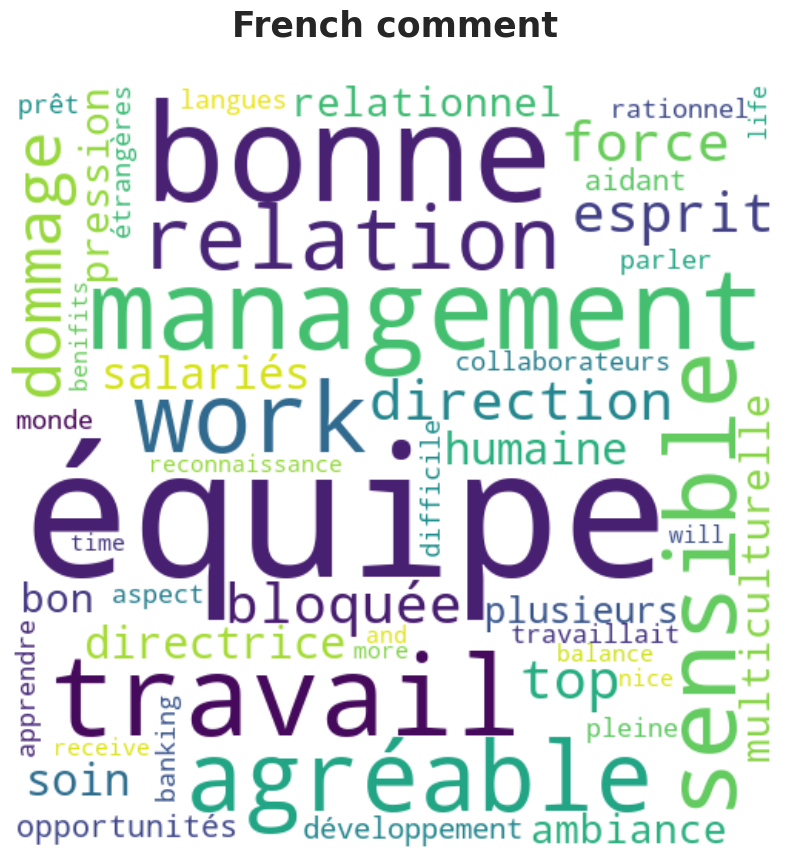

In [91]:
plt.figure(figsize=(12, 10))
plot_wordcloud(df_comment_fr['comment'], "French",stop_word_fr)
plt.show()

Pour les commentaires en français, l'accent est visiblement mis sur des mots et termes à connotation assez positive comme **bon, développement, bonne, ecoute, ambiance, relation, top, soin, multiculturelle** ce qui laisse croire que l'environnement de travail est assez apprécié compte tenu de l'ambiance qui y règne, du multiculturalisme et de l'entraide.  
Mais l'on retrouve également des termes comme **dommage, difficile, pression** qui ont une connotation plutôt négative.

## WordCloud des commentaires en Anglais

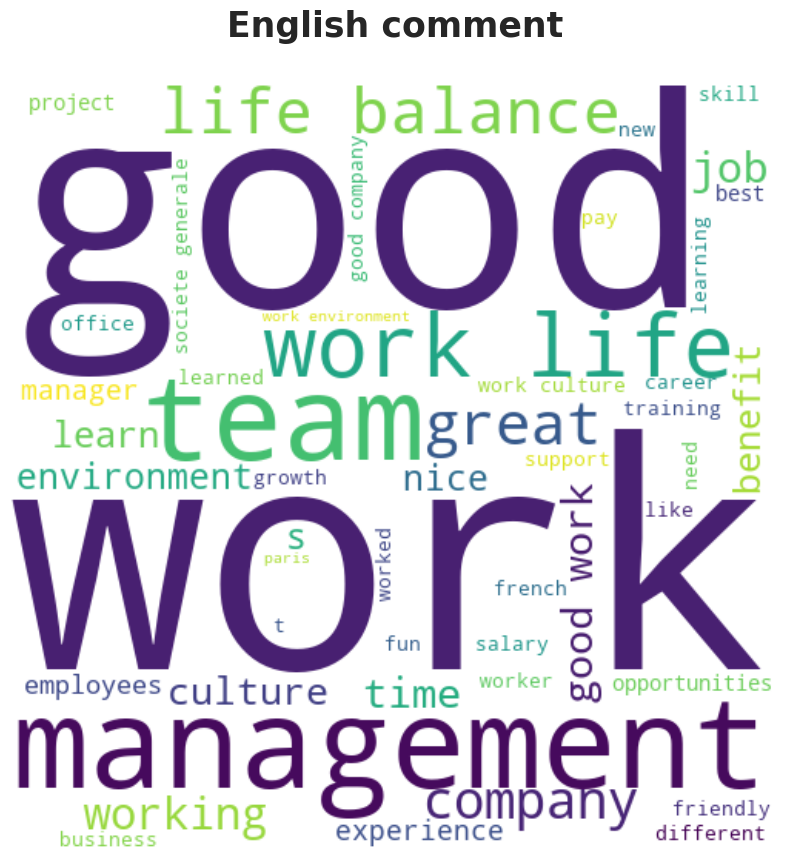

In [92]:
plt.figure(figsize=(12, 10))
plot_wordcloud(df_comment_ang['comment'], "English",stop_word_en)
plt.show()

Quant aux commentaires en anglais, on note la présence des termes tels que good, fun, nice, learn, culture, friendly, excellent, qui nous rassure sur la bonne appréciation de la Société Générale par les stagiaires et employés.

## Analyse sentimentale des commentaires

L'analyse des sentiments consiste essentiellement à juger le sentiment qui se cache derrière un écrit. Elle consiste à prendre un morceau de texte, qu'il s'agisse d'une phrase ou d'un article complet, et à analyser l'émotion que l'auteur exprime. Dans notre analyse, nous allons calculer pour chaque commentaire, le score de sentiment positif, négatif ou neutre qu'il exprime. Nous classerons ensuite chaque commentaire en fonction du sentiment positif, négatif ou neutre.

**Le score de sentiment** indique la probabilité de la nature d'un sentiment exprimé à travers un commentaire.

La bibliothèque VADER renvoie 4 valeurs telles que :

**pos**: La probabilité que le sentiment soit positif

**neu**: La probabilité que le sentiment soit neutre

**neg**: La probabilité que le sentiment soit négatif

**compound**: Le score composé et qui prend des valeurs de -1 à 1

## Score de sentiment pour les commentaires en Français

In [93]:
df_comment_fr['negatif_feeling'] = df_comment_fr['comment'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
df_comment_fr['neutral_feeling'] = df_comment_fr['comment'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
df_comment_fr['positif_feeling'] = df_comment_fr['comment'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
df_comment_fr['compound_feeling'] = df_comment_fr['comment'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
df_comment_fr.head()

/tmp/ipykernel_5064/2849569866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comment_fr['negatif_feeling'] = df_comment_fr['comment'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
/tmp/ipykernel_5064/2849569866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comment_fr['neutral_feeling'] = df_comment_fr['comment'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
/tmp/ipykernel_5064/2849569866.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,comment,langues,negatif_feeling,neutral_feeling,positif_feeling,compound_feeling
0,bonne équipe dommage que la direction soit bl...,fr,0.0,1.000,0.000,0.0000
1,équipe au top l esprit d équipe fait la force...,fr,0.0,0.935,0.065,0.2023
2,bonne ambiance bonne équipe bon relationnel ...,fr,0.0,1.000,0.000,0.0000
3,missions variées solidarité dans l équipe et ...,fr,0.0,1.000,0.000,0.0000
4,première expérience professionnelle durant an...,fr,0.0,0.930,0.070,0.4767


In [94]:
df_comment_fr.shape

(1736, 6)

## Score de sentiment pour les commentaires en Anglais

In [95]:
df_comment_ang['negatif_feeling'] = df_comment_ang['comment'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
df_comment_ang['neutral_feeling'] = df_comment_ang['comment'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
df_comment_ang['positif_feeling'] = df_comment_ang['comment'].apply(lambda x:analyzer.polarity_scores(x)['pos'])
df_comment_ang['compound_feeling'] = df_comment_ang['comment'].apply(lambda x:analyzer.polarity_scores(x)['compound'])
df_comment_ang.head()

/tmp/ipykernel_5064/3827995492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comment_ang['negatif_feeling'] = df_comment_ang['comment'].apply(lambda x:analyzer.polarity_scores(x)['neg'])
/tmp/ipykernel_5064/3827995492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comment_ang['neutral_feeling'] = df_comment_ang['comment'].apply(lambda x:analyzer.polarity_scores(x)['neu'])
/tmp/ipykernel_5064/3827995492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,comment,langues,negatif_feeling,neutral_feeling,positif_feeling,compound_feeling
103,good relations in the teams kind and attentiv...,en,0.000,0.594,0.406,0.8910
218,french leader in derivative products societe ...,en,0.000,0.724,0.276,0.9552
251,great place to work management are supportive...,en,0.030,0.654,0.316,0.9670
260,good balance between personal life and job int...,en,0.027,0.893,0.080,0.4317
383,very poor management our team leader was pick...,en,0.158,0.795,0.046,-0.8795


## Scores  pour l'anglais et francais

In [96]:
base=pd.concat([df_comment_fr,df_comment_ang])

In [97]:
def histogram(df):
    fig, axes = plt.subplots(2, 2, figsize=(10,8))
    df.hist('negatif_feeling', bins=25, ax=axes[0,0], color='lightcoral', alpha=0.6)
    axes[0,0].set_title('Negative Sentiment Score')
    df.hist('neutral_feeling', bins=25, ax=axes[0,1], color='lightsteelblue', alpha=0.6)
    axes[0,1].set_title('Neutral Sentiment Score')
    df.hist('positif_feeling', bins=25, ax=axes[1,0], color='chartreuse', alpha=0.6)
    axes[1,0].set_title('Positive Sentiment Score')
    df.hist('compound_feeling', bins=25, ax=axes[1,1], color='navajowhite', alpha=0.6)
    axes[1,1].set_title('Compound')
    fig.text(0.5, 0.04, 'Scores de sentiment',  fontweight='bold', ha='center')
    fig.text(0.04, 0.5, 'Nombre de commentaires', fontweight='bold', va='center', rotation='vertical')
    plt.suptitle('Analyse sentimentale des employées de SG \n\n', fontsize=12, fontweight='bold');

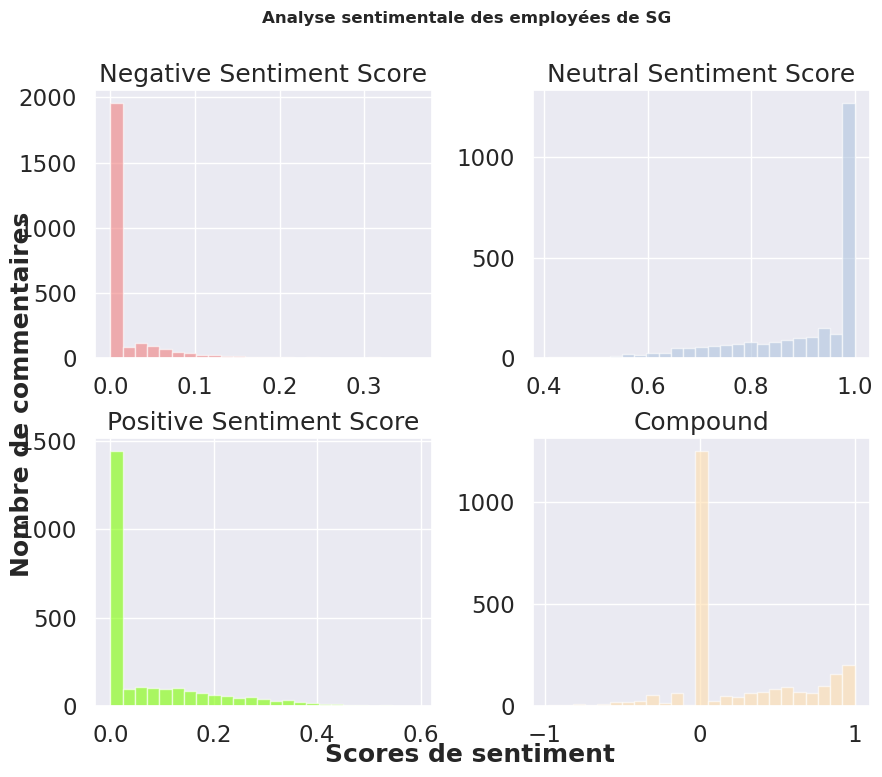

In [98]:
histogram(base)

#### Calcul du sentiment des avis à partir de la polarité de Textblob

Le package **textblob** renvoie deux valeurs dont la polarité qui est positive pour un sentiment positif, nulle pour un sentiment neutre et négative pour un sentiment négatif; la seconde valeur représente la subjectivité de l'analyse. Plus elle est proche de 0 et plus l'analyse est objective.

In [101]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

In [102]:
from textblob import TextBlob
from textblob import TextBlob, Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

In [103]:
def comment_polarite(text):
    return tb(text).sentiment[0]

Les codes sont définis à l'aide des fonctions ci-dessous comme suit: -1 pour tout sentiment négatif, 0 pour tout sentiment neutre et 1 pour tout sentiment positif.

In [104]:
def comment_label_car(text):
    if comment_polarite(text) > 0 :
        return "positif"
    if comment_polarite(text) < 0 :
        return "negatif"
    return "neutre"

In [105]:
def comment_label(text):
    if comment_polarite(text) > 0 :
        return 1
    if comment_polarite(text) < 0 :
        return -1
    return 0

In [106]:
df_comment["score_polarite"] = df_comment["comment"].apply(comment_polarite)

df_comment["label_car"] = df_comment["comment"].apply(comment_label_car)

df_comment["label"] = df_comment["comment"].apply(comment_label)

In [107]:
df_comment.sample(4)

,comment,langues,score_polarite,label_car,label
2397,good learning but do not expect reward if you ...,en,0.050000,positif,1
1601,pas assez d heures de travail car je ne faisai...,fr,0.000000,neutre,0
282,bonjour ça fait un an et demi que je travai...,fr,0.182222,positif,1
1324,le poste est très agréable et l ambiance est v...,fr,0.320000,positif,1


Au niveau de la variable "label", on a les modalités -1, 0 et 1 et la variable "label_car" nous renseigne sur la signification de cette codification.

In [108]:
#Reindexation du tableau avec une colonne ID
df_comment['id']= df_comment.index

In [109]:
round(df_comment.describe(), 3)

,score_polarite,label,id
count,2520.000,2520.000,2520.000
mean,0.202,0.827,1259.500
std,0.168,0.536,727.606
min,-0.700,-1.000,0.000
25%,0.110,1.000,629.750
50%,0.207,1.000,1259.500
75%,0.298,1.000,1889.250
max,1.000,1.000,2519.000


Le tableau ci-dessus nous montre qu'en moyenne, le score de polarité est stritement positif et le label également, ce qui montre qu'entre 2012 et 2022, les avis des employés et stagiaires de la SG sont en général plus positifs que négatifs.

In [110]:
df_comment.groupby("label_car")["id"].count()

label_car
negatif     182
neutre       71
positif    2267
Name: id, dtype: int64

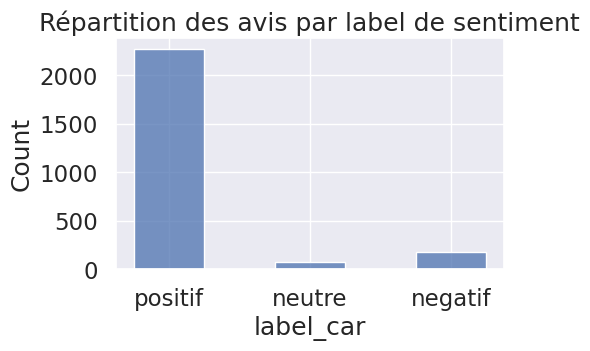

In [111]:
plt.figure(figsize=(5, 3))
sns.set_style('darkgrid')
sns.histplot(df_comment.sort_values("label_car", ascending=False), x="label_car",  shrink=0.5)
plt.title("Répartition des avis par label de sentiment")
plt.show()

La grande majorité des avis ont été désignés par TextBlob comme positifs en terme de sentiment avec très peu de neutres et peu de négatifs.

#### Topic modeling : Latent Dirichlet Allocation (LDA) Model

Le topic modeling est un modèle permettant de déterminer des sujets ou des thèmes abstraits d'un document. Utilisé dans plusieurs domaines, il permet en marketing par exemple d'analyser la satisfaction de la clientèle dans le but de proposer des produits plus ciblés ou encore en science sociale pour l'analyse des sentiments de la population sur un sujet précis. Il comporte en général trois algorithmes dont le LDA que l'on implémentera ici.
LDA est un modèle probabiliste et algorithmique qui parcoure les textes pour former des groupes de mots qui apparaissent souvent et ainsi découvrir des thèmes.

##### LDA par type de sentiment
On se propose à présent de visualiser les wordclouds selon le sentiment pour faire ressortir les mots qui peuvent attirer l'attention sur un ou plusieurs aspects importants qui justifieraient le sentiment contenu dans les commentaires.

In [112]:
import random

def couleur_rouge(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(0, 100%, {random.randint(25, 75)}%)" 

def couleur_verte(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl({random.randint(90, 150)}, 100%, 30%)" 

def couleur_jaune(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(42, 100%, {random.randint(25, 50)}%)"

In [113]:
def trace_3_wordclouds_alignes(mots_neg, mots_neu, mots_pos):
    fig, axes = plt.subplots(1,3, figsize=(25,25))
    
    wordcloud_neg = WordCloud(stopwords=stop_words,
                          background_color='white', # mask=mask_bavette,# width=mask.shape[1], height=mask.shape[0],
                          collocations=False, collocation_threshold=100,
                          max_words=100, min_word_length=4, colormap='Reds'
                         ).generate(mots_neg)
    axes[0].imshow(wordcloud_neg.recolor(color_func=couleur_rouge, random_state=3), interpolation='bilinear')
    axes[0].set_title("Sentiment négatif", size=20)
    axes[0].axis("off")

    wordcloud_neu = WordCloud(stopwords=stop_words,
                          background_color='white',
                          collocations=False, collocation_threshold=100,
                          max_words=100, min_word_length=4, colormap='Greens'
                         ).generate(mots_neu)
    axes[1].imshow(wordcloud_neu.recolor(color_func=couleur_jaune, random_state=3), interpolation='bilinear')
    axes[1].set_title("Sentiment neutre", size=20)
    axes[1].axis("off")

    wordcloud_pos = WordCloud(stopwords=stop_words,
                          background_color='white', #mask=mask_vaccin, 
                          collocations=False, collocation_threshold=100,
                          max_words=100, min_word_length=4, colormap='Greens'
                         ).generate(mots_pos)
    axes[2].imshow(wordcloud_pos.recolor(color_func=couleur_verte, random_state=3), interpolation='bilinear')
    axes[2].set_title("Sentiment positif", size=20)
    axes[2].axis("off")

    plt.tight_layout()
    plt.show();

In [114]:
import gensim.corpora as corpora 
def model_lda(data):
    # créer un dictionnaire
    id2word = corpora.Dictionary(data) 
    # Créer un corpus
    texts = data
    # Prendre la position de chaque élement au sein de chaque liste
    corpus = [id2word.doc2bow(text) for text in texts]

    # nombre de sujets
    num_topics = 20

    # Construction du modèle LDA pour chaque type de sentiment
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

    # Principaux mots des sujets ressortis
    sujet = lda_model.print_topics()
    return sujet

In [115]:
df_comment['liste_mots']= df_comment['comment'].apply(lambda x: x.split())
df_comment.head(3)

,comment,langues,score_polarite,label_car,label,id,liste_mots
0,bonne équipe dommage que la direction soit bl...,fr,0.066667,positif,1,0,"[bonne, équipe, dommage, que, la, direction, s..."
1,équipe au top l esprit d équipe fait la force...,fr,0.115000,positif,1,1,"[équipe, au, top, l, esprit, d, équipe, fait, ..."
2,bonne ambiance bonne équipe bon relationnel ...,fr,0.487500,positif,1,2,"[bonne, ambiance, bonne, équipe, bon, relation..."


In [116]:
lda_negatif = model_lda(df_comment[df_comment["label_car"] == "negatif"]["liste_mots"])
lda_positif = model_lda(df_comment[df_comment["label_car"] == "positif"]["liste_mots"])
lda_neutre = model_lda(df_comment[df_comment["label_car"] == "neutre"]["liste_mots"])

In [117]:
# Liste des mots des sujets détectés par le LDA pour chaque type de sentiment
num_topics=20
liste=[]
def sujet_detecte(lda):
    for i in range(num_topics):
        for x in re.sub(r"[\+\*]","",(re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", lda[i][1]))).split('"'):
            if len(x)>2:
                liste.append(x)
    return liste

In [118]:
sujets_negatif = sujet_detecte(lda_negatif)
sujets_neutre = sujet_detecte(lda_neutre)
sujets_positif = sujet_detecte(lda_positif)

In [119]:
# Wordcloud par type de sentiment à partir des résultats du modèle LDA
def plot_wordcloud_label() :
    # joindre les tweets en une chaine de caractere par type de sentiment
    mots_pos = ' '.join(sujets_positif)
    mots_neg = ' '.join(sujets_negatif)
    mots_neu = ' '.join(sujets_neutre)
        
    trace_3_wordclouds_alignes(mots_neg, mots_neu, mots_pos)

NameError: name 'stop_words' is not defined

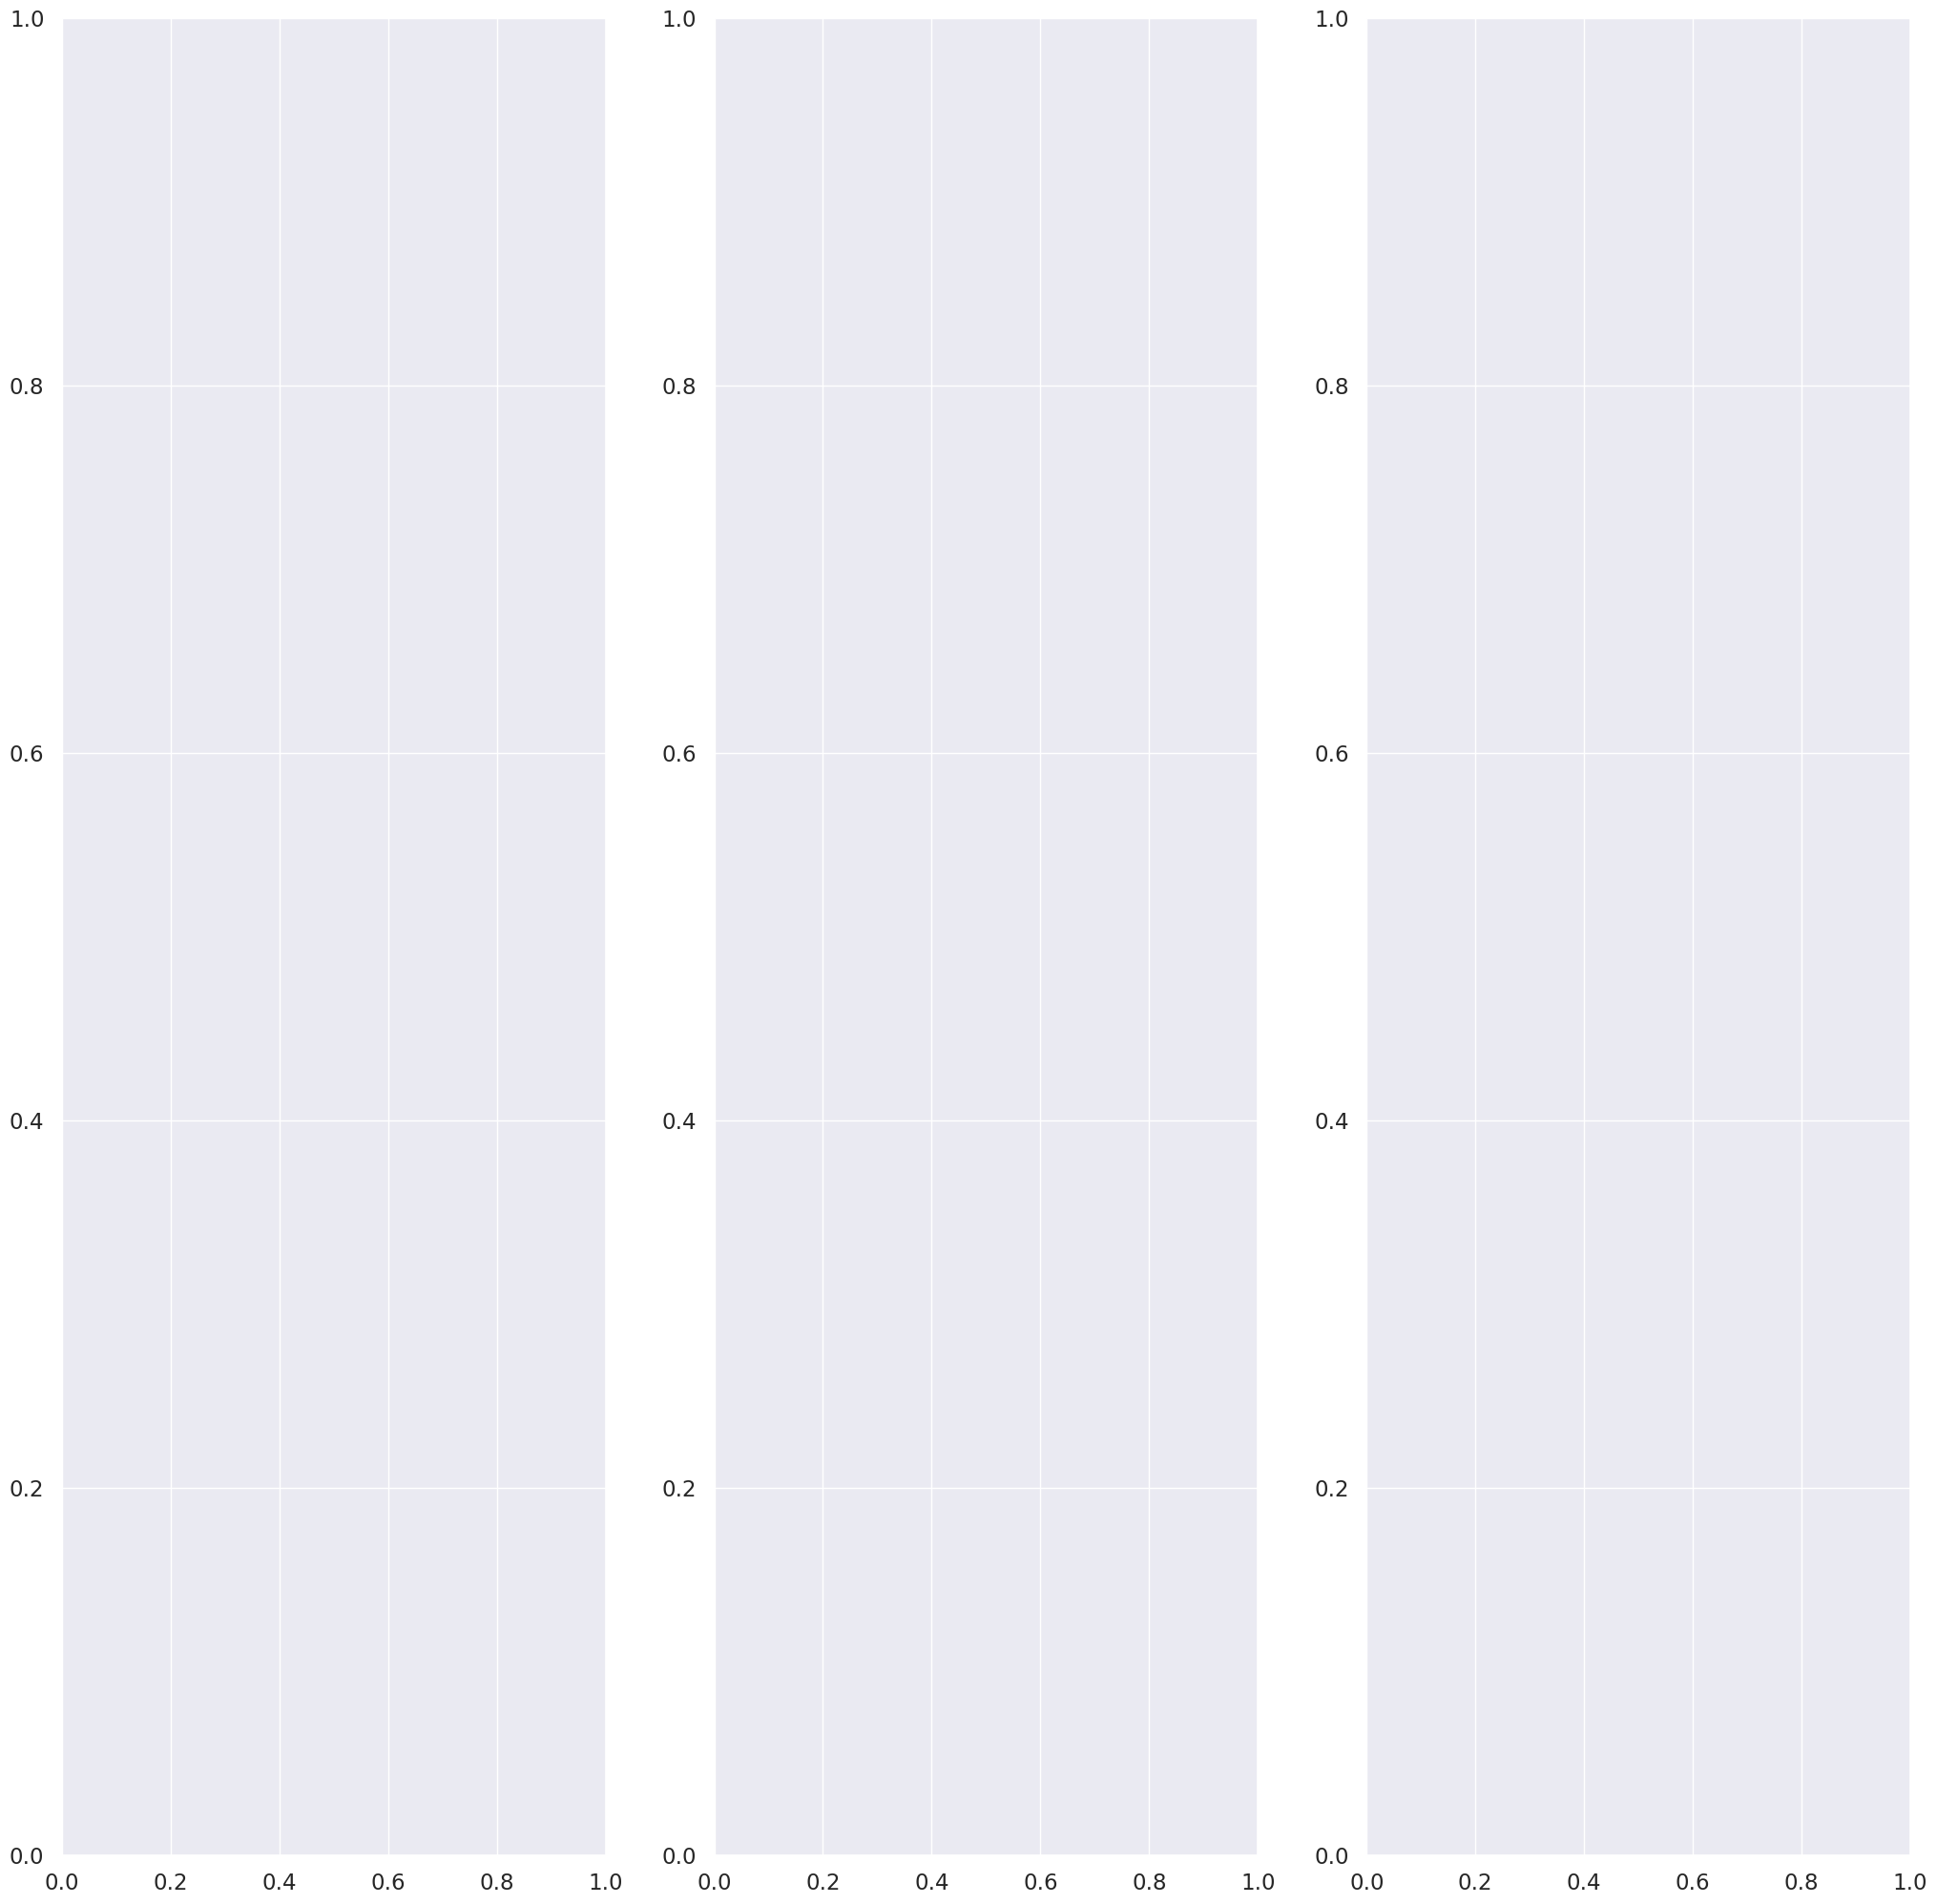

In [120]:
plot_wordcloud_label() 

### Conclusion

**Apport** : Cette étude a été pour nous un défi à relever; elle nous a permis de mettre en pratique la quasi totalité des notions apprises en cours, et même d'en apprendre d'autres. Nous avons rencontré des difficultés tant au niveau du traitement des données qu'au niveau de la modélisation, mais c'est avec enthousiasme que nous avons fait face à ces difficultés.

**Bilan** : Notre étude a montré que les avis des stagiaires et employés de la Société Générale sont en majorité positifs en terme de sentiment avec très peu de neutres et peu de négatifs. Les commentaires ont été transmis en 7 langues distinctes dont le français et l'anglais. L'analyse des commentaires en français nous a permis de remarquer que plusieurs termes à connotation positive reviennent notamment bon,top, agréable, ambiance, relation, top, soin, multiculturelle ce qui laisse croire que l'environnement de travail est assez apprécié compte tenu de l'ambiance qui y règne, du multiculturalisme et de l'entraide. On retrouve également des termes comme dommage, difficile, pression qui ont plutôt une connotation négative. Quant aux commentaires en anglais, on note la présence des termes tels que good, fun, nice, learn, culture, friendly, excellent, qui nous rassure sur la bonne appréciation de la Société Générale par les stagiaires et employés.

**Limites** : Les commentaires récupérés sur Indeed n'ont pas tous été écrits selon les règles grammaticales. Il s'agit d'une limite pour notre étude car le nettoyage de ces données nécessite beaucoup d'efforts. Aussi, l'implémentation du NLP notamment du topic modeling a été difficile et reste imcomplet dans notre projet.